<a href="https://colab.research.google.com/github/nabilshahad/Scikit-learn/blob/main/SKlearn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
col_names= iris.feature_names
target_names=iris.target_names
print("column name",col_names)
print("target name",target_names)
print("First 10 Rows\n",x[:5])

column name ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target name ['setosa' 'versicolor' 'virginica']
First 10 Rows
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Linear Regression


In [6]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df =pd.DataFrame(data=iris.data,columns=iris.feature_names)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          

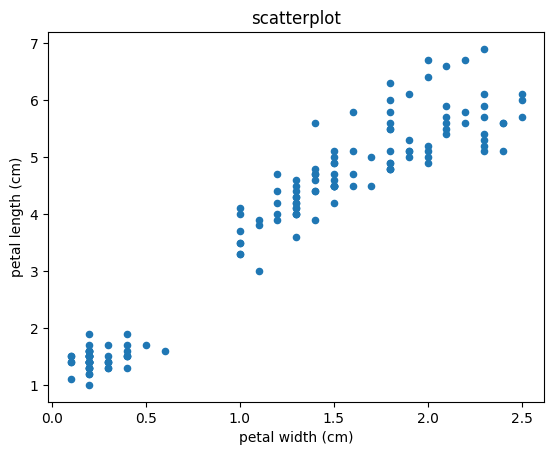

In [9]:
#EDA
df.head()
df.shape
df.plot.scatter(x='petal width (cm)',y='petal length (cm)',title='scatterplot')
print(df.corr())
print(df.describe())

In [10]:
# pre processing
y= df['petal width (cm)'].values.reshape(-1,1)
X =df['petal length (cm)'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
print(X_train)
print(X_test)

[[3.9]
 [4.9]
 [4.2]
 [4.8]
 [4.4]
 [1.7]
 [5.5]
 [1.5]
 [6.7]
 [5. ]
 [1.5]
 [5.1]
 [3.5]
 [3.9]
 [5.5]
 [3.9]
 [1.6]
 [5. ]
 [1.5]
 [3.3]
 [1.4]
 [1.3]
 [5. ]
 [5.6]
 [4.5]
 [5.8]
 [4.1]
 [1.5]
 [5.9]
 [6.7]
 [1.3]
 [4.7]
 [1.4]
 [5.1]
 [4.7]
 [4.4]
 [4.5]
 [1.3]
 [1.6]
 [4.5]
 [6.6]
 [4.8]
 [1.5]
 [1.3]
 [1.7]
 [1.5]
 [1.4]
 [5.6]
 [4.5]
 [5.2]
 [4.6]
 [4.1]
 [4.2]
 [5.1]
 [5.3]
 [4.7]
 [4.2]
 [1.4]
 [1.5]
 [4.6]
 [3.6]
 [1.5]
 [4.3]
 [4. ]
 [4. ]
 [1.4]
 [1.4]
 [4.8]
 [4.1]
 [4.9]
 [4.6]
 [4.9]
 [1.4]
 [5.8]
 [6.9]
 [5.6]
 [5.1]
 [5.9]
 [4.8]
 [3.5]
 [1.5]
 [4.9]
 [5.7]
 [5.4]
 [4.5]
 [6. ]
 [5.1]
 [5. ]
 [4. ]
 [1.6]
 [1.4]
 [4.5]
 [1.7]
 [4.7]
 [1. ]
 [5.6]
 [4.3]
 [4. ]
 [5.4]
 [3.8]
 [5.7]
 [1.6]
 [6. ]
 [5.6]
 [3. ]
 [1.4]
 [6.3]
 [5.1]
 [1.3]
 [1.5]
 [5.5]
 [1.3]
 [1.6]
 [5.2]
 [5.3]
 [1.1]
 [1.4]
 [1.2]
 [1.2]
 [1.5]]
[[4.2]
 [4.4]
 [5.8]
 [6.1]
 [1.5]
 [5.7]
 [3.7]
 [1.7]
 [1.9]
 [1.6]
 [1.6]
 [4.9]
 [6.4]
 [1.5]
 [1.4]
 [4.4]
 [4. ]
 [6.1]
 [1.4]
 [4.5]
 [5.1]
 [1.3]
 [4.5

In [11]:
#Train model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

[-0.33836337]
[[0.41027573]]


In [12]:
#Predictions
score = regressor.predict([[7.5]])
print(score)

[[2.73870464]]


In [13]:
def calc(slope,intercept,value):
  return slope*value+intercept

In [14]:
score=calc(regressor.coef_,regressor.intercept_,7.5)
print(score)

[[2.73870464]]


In [15]:
y_pred= regressor.predict(X_test)
df_pred = pd.DataFrame({'Actual':y_test.squeeze(),'Predicted':y_pred.squeeze()})
print(df_pred)

    Actual  Predicted
0      1.3   1.384795
1      1.4   1.466850
2      1.8   2.041236
3      2.5   2.164319
4      0.2   0.277050
5      2.1   2.000208
6      1.0   1.179657
7      0.2   0.359105
8      0.4   0.441161
9      0.2   0.318078
10     0.2   0.318078
11     1.5   1.671988
12     2.0   2.287401
13     0.2   0.277050
14     0.2   0.236023
15     1.2   1.466850
16     1.2   1.302740
17     2.3   2.164319
18     0.2   0.236023
19     1.7   1.507877
20     1.8   1.754043
21     0.3   0.194995
22     1.6   1.507877
23     1.5   1.589933
24     0.2   0.441161
25     2.4   1.754043
26     0.2   0.236023
27     2.4   1.959181
28     1.0   1.015547
29     1.9   2.164319


In [16]:
#Evaluating the model
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
mae= mean_absolute_error(y_test,y_pred)
mse =mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


0.04380846138037837
0.16014006799854197
0.2093047094080264
